In [30]:
import konlpy

In [31]:
import matplotlib.pylab as plt
%matplotlib inline
from wordcloud import WordCloud
import nltk
from konlpy.corpus import kolaw
from konlpy.tag import *
import pandas as pd
import platform
from collections import Counter
from matplotlib import font_manager, rc
from konlpy.tag import Twitter; t = Twitter()
import numpy as np
from PIL import Image
from wordcloud import ImageColorGenerator

C:\Users\user\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [32]:
import colorsys
import random
import platform

In [51]:
df = pd.read_csv("C:/Users/user/Desktop/finished_petition_csv.csv")

In [52]:
def fied_names_num(df):
    names = list(set(df["카테고리"]))
    for name in names:
        print(name, " : ", len(df[df["카테고리"]==name]["카테고리"]))

In [59]:
# 카테고리별 청원 수 출력

fied_names_num(df)

안전/환경  :  782
저출산/고령화대책  :  50
육아/교육  :  724
교통/건축/국토  :  473
정치개혁  :  541
성장동력  :  91
인권/성평등  :  577
보건복지  :  759
미래  :  215
외교/통일/국방  :  404
반려동물  :  72
행정  :  434
문화/예술/체육/언론  :  244
기타  :  857
경제민주화  :  264
일자리  :  346
농산어촌  :  30


In [60]:
# 카테고리별 청원수 100개 이상 출력

fied_names_num(df[df["청원수"]>100])

안전/환경  :  276
저출산/고령화대책  :  7
육아/교육  :  496
교통/건축/국토  :  159
정치개혁  :  168
성장동력  :  37
인권/성평등  :  325
보건복지  :  497
미래  :  39
외교/통일/국방  :  154
반려동물  :  43
행정  :  245
문화/예술/체육/언론  :  126
기타  :  372
경제민주화  :  98
일자리  :  135
농산어촌  :  15


In [61]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

In [62]:
def make_cloud(category, png_name=0,state="no", background_color_n='white', max_font_size_n = 40):
        
    df1= (df[df["카테고리"]==category])

    text = list(df1["본문"])
    text = ' '.join(text)
    
    ko_con_text = text
    print(len(text))
    #print(text)
    tokens_ko = t.nouns(ko_con_text)
    print("ok")
    stop_words = ['직','제','저', '이','그','때','및','것이','합니다.','\\n',':','','거','수','그' ,"합","이","있는","있습니다.","것","및","하지만","때문에"]
    tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]

    text = ' '.join(tokens_ko)
    #text
    #f = open(category+".txt", 'w')
    #f.write(text)
    #f.close()

    ko = nltk.Text(tokens_ko, name= category+' 청원')
    
    if platform.system() == 'Darwin': 
        font_url = "/Library/Fonts/AppleGothic.ttf"
        rc('font', family='AppleGothic')
        #Mac pc의 경우
    elif platform.system() == 'Windows': 
        font_url = 'C:/Windows/Fonts/malgun.ttf'
        font_name = font_manager.FontProperties(fname=font_url).get_name()
        rc('font', family=font_name)
    elif platform.system() == 'Linux': 
        font_url = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"
        font_name = font_manager.FontProperties(fname=font_url).get_name()
        rc('font', family=font_name)

    %matplotlib inline

    data = ko.vocab().most_common(500)
    tmp_data = dict(data)

    if(png_name):
        korea = np.array(Image.open("C:/Users/user/Desktop/"+png_name))
    else:
        korea = np.array(Image.open("C:/Users/user/Desktop/"+category+"1.png"))
    
    image_colors = ImageColorGenerator(korea)
    
    
    wordcloud = WordCloud(font_path=font_url,
                         relative_scaling = 0.2, mask=korea,
                         background_color=background_color_n,
                          min_font_size=1, max_font_size=max_font_size_n
                         ).generate_from_frequencies(tmp_data)
    plt.figure(figsize=(30,30))
    
    #설정에 맞게 색깔 변경
    if state == "no":
        plt.imshow(wordcloud)
    elif state == "img":
        plt.imshow(wordcloud.recolor(color_func=image_colors) ,interpolation='bilinear')
    elif state == "grey":
        plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3) ,interpolation='bilinear')
    else:
        plt.imshow(wordcloud.recolor(color_func=lambda *args, **kwargs: state, random_state=3) ,interpolation='bilinear')
    
    plt.axis("off")
    plt.show()

515569
ok


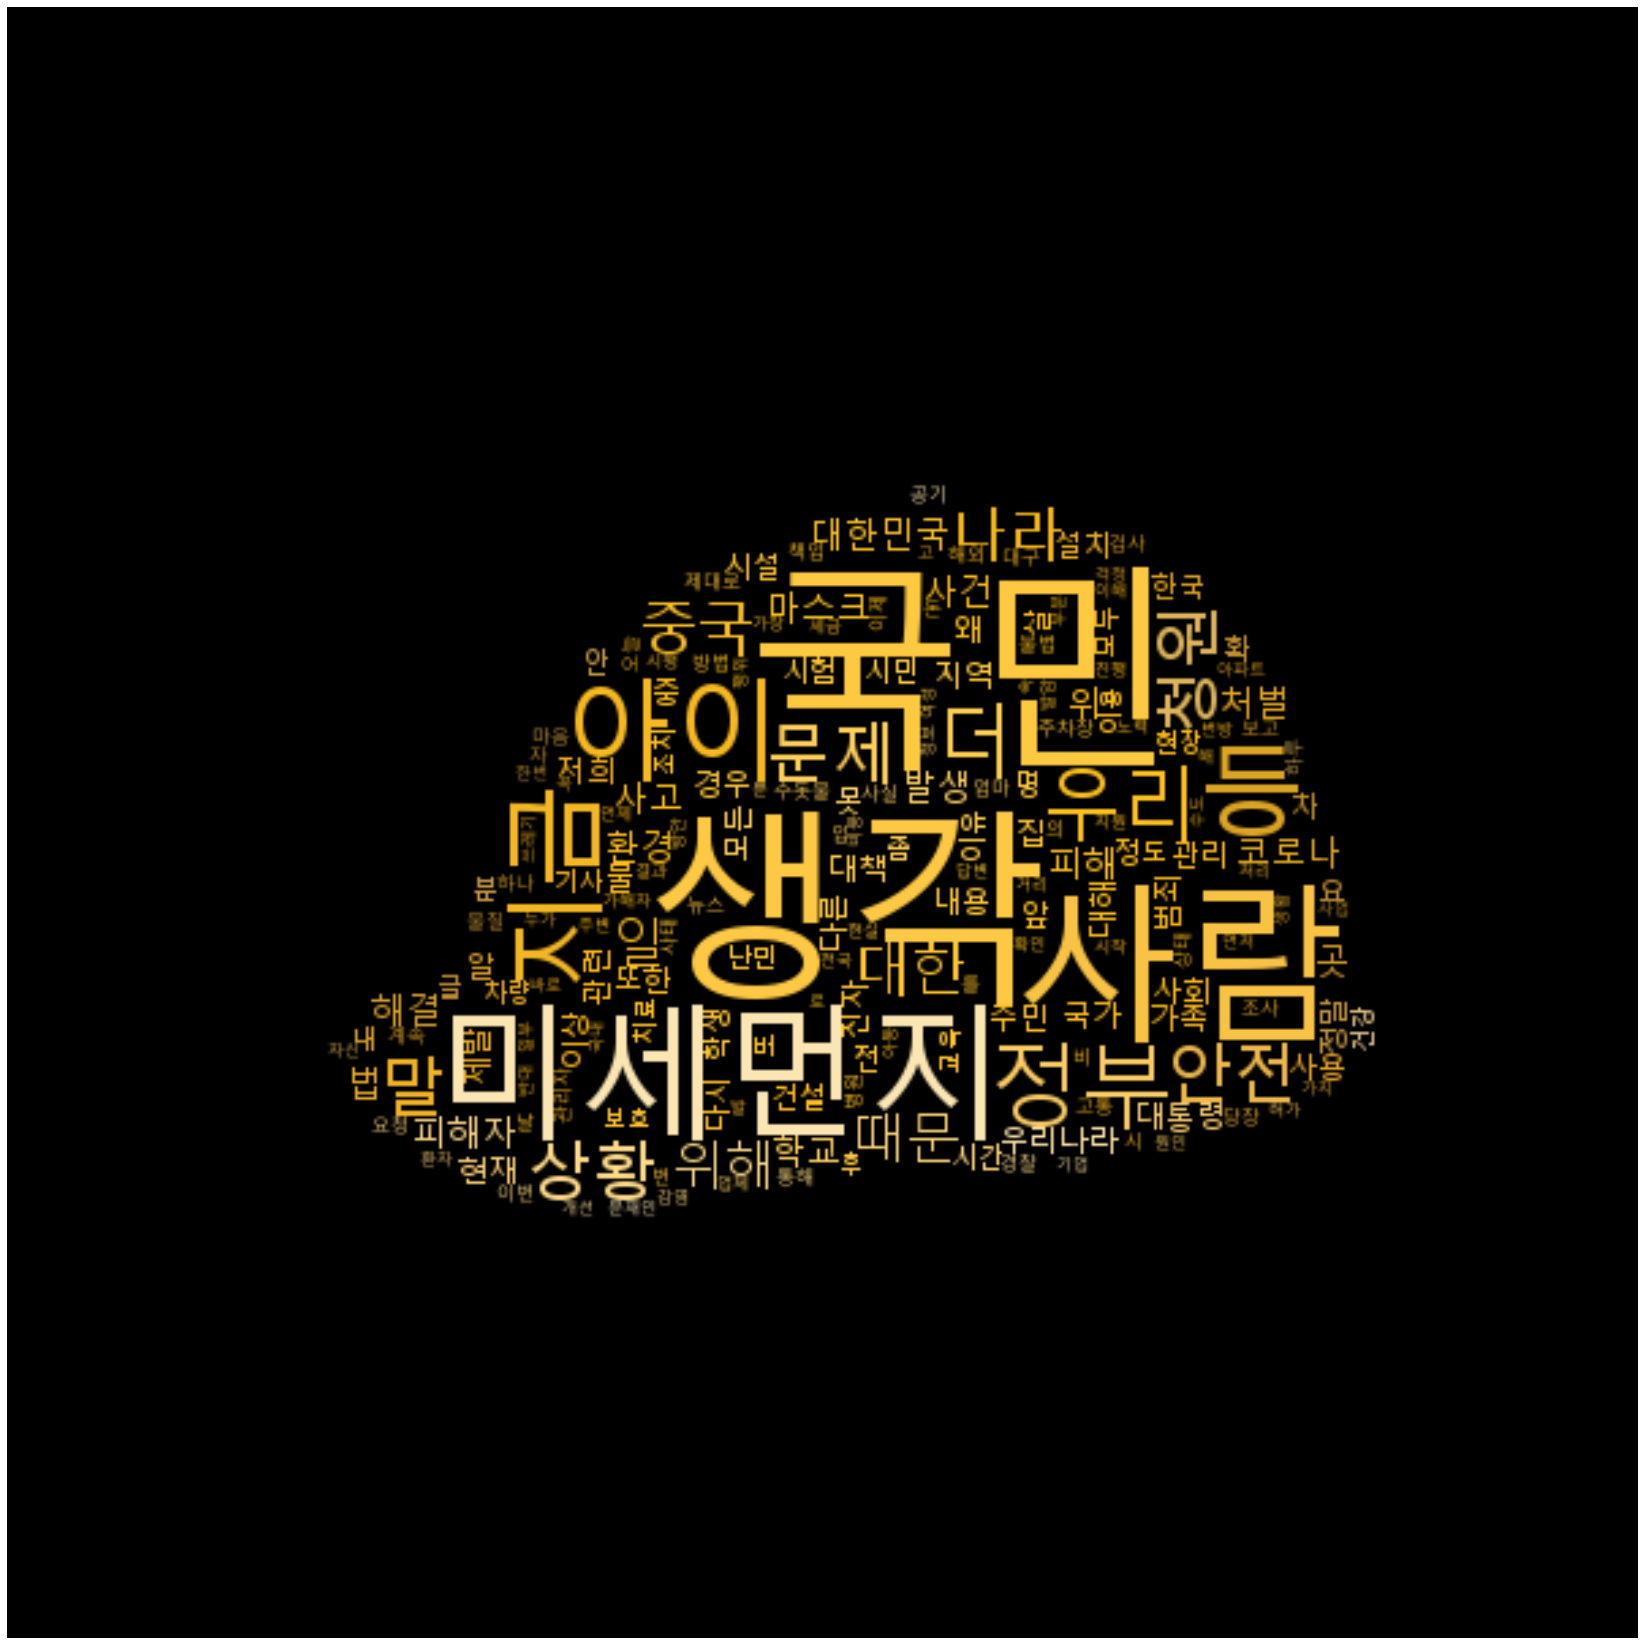

In [77]:
make_cloud("안전/환경","안전.jpg",max_font_size_n = 80,background_color_n='black',state="img")

25055
ok


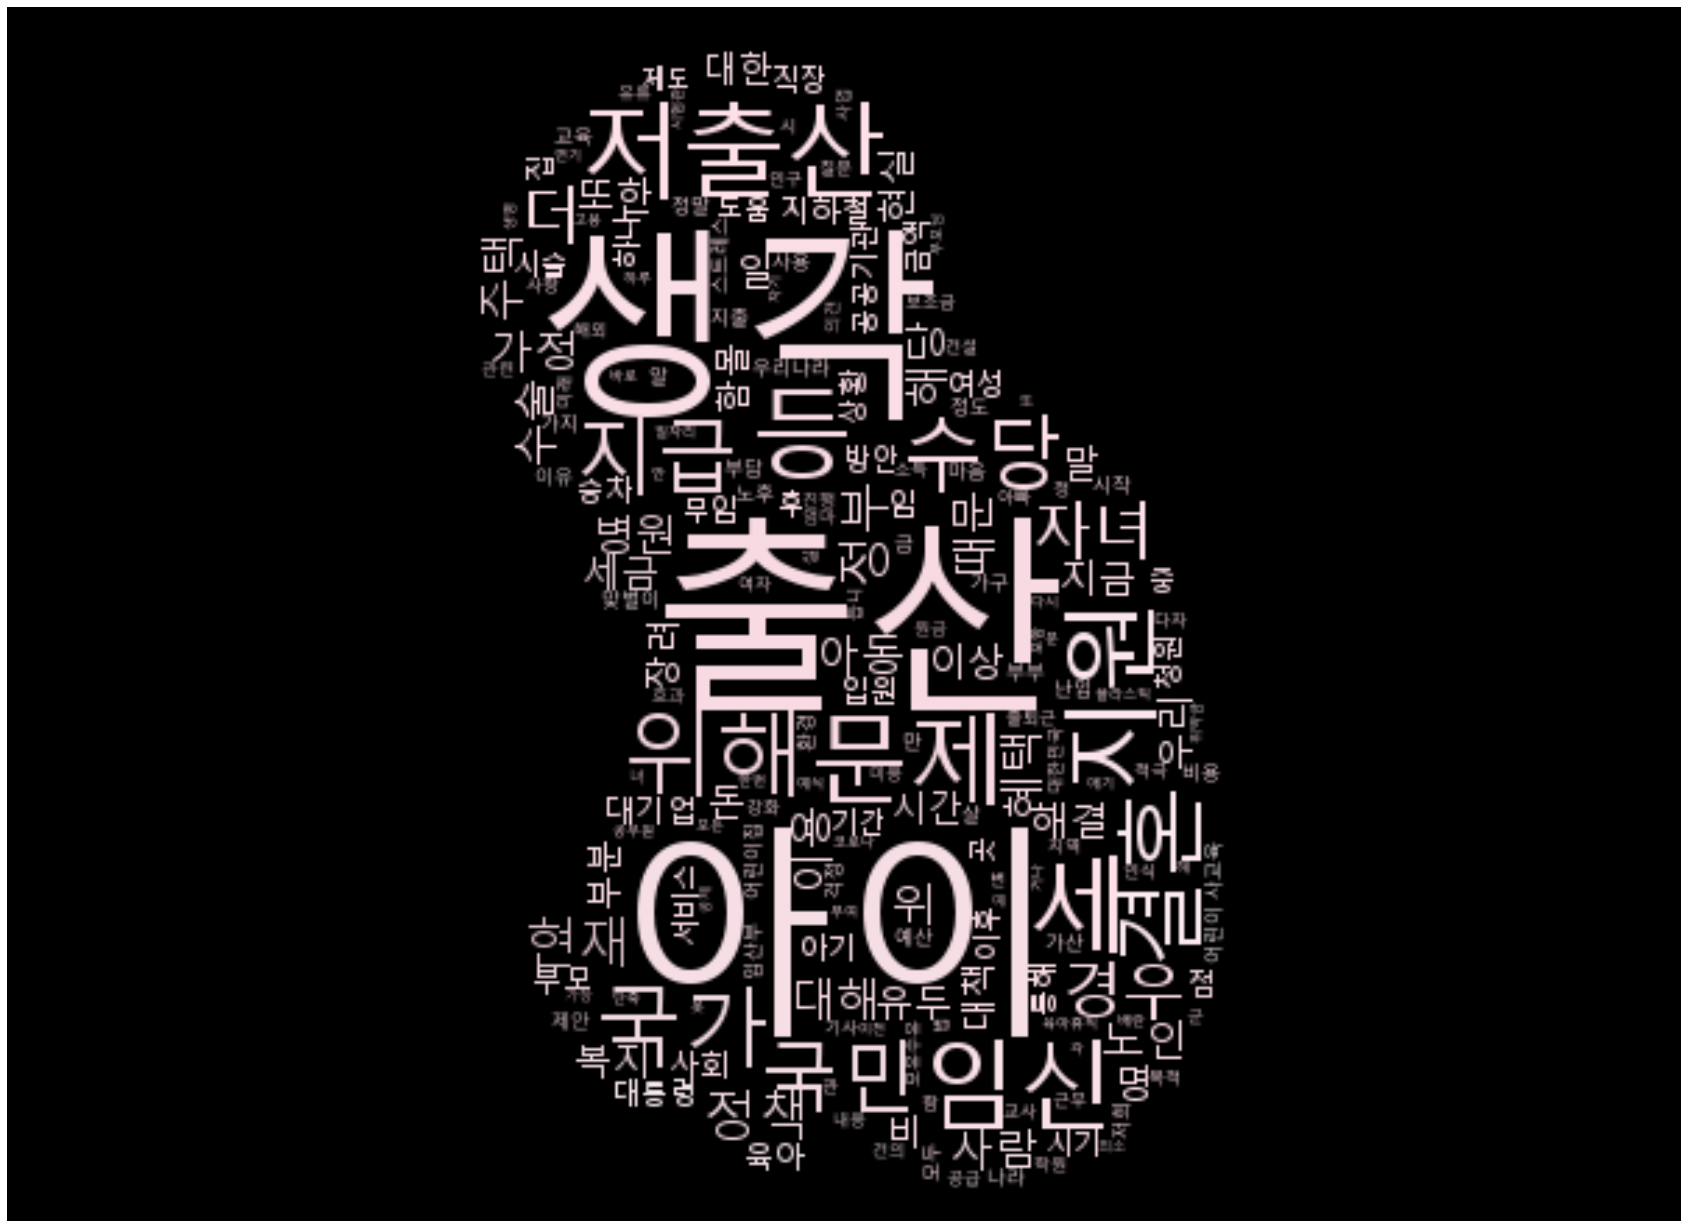

In [80]:
make_cloud("저출산/고령화대책","저출산.jpg",max_font_size_n = 80,background_color_n='black',state="img")

753647
ok


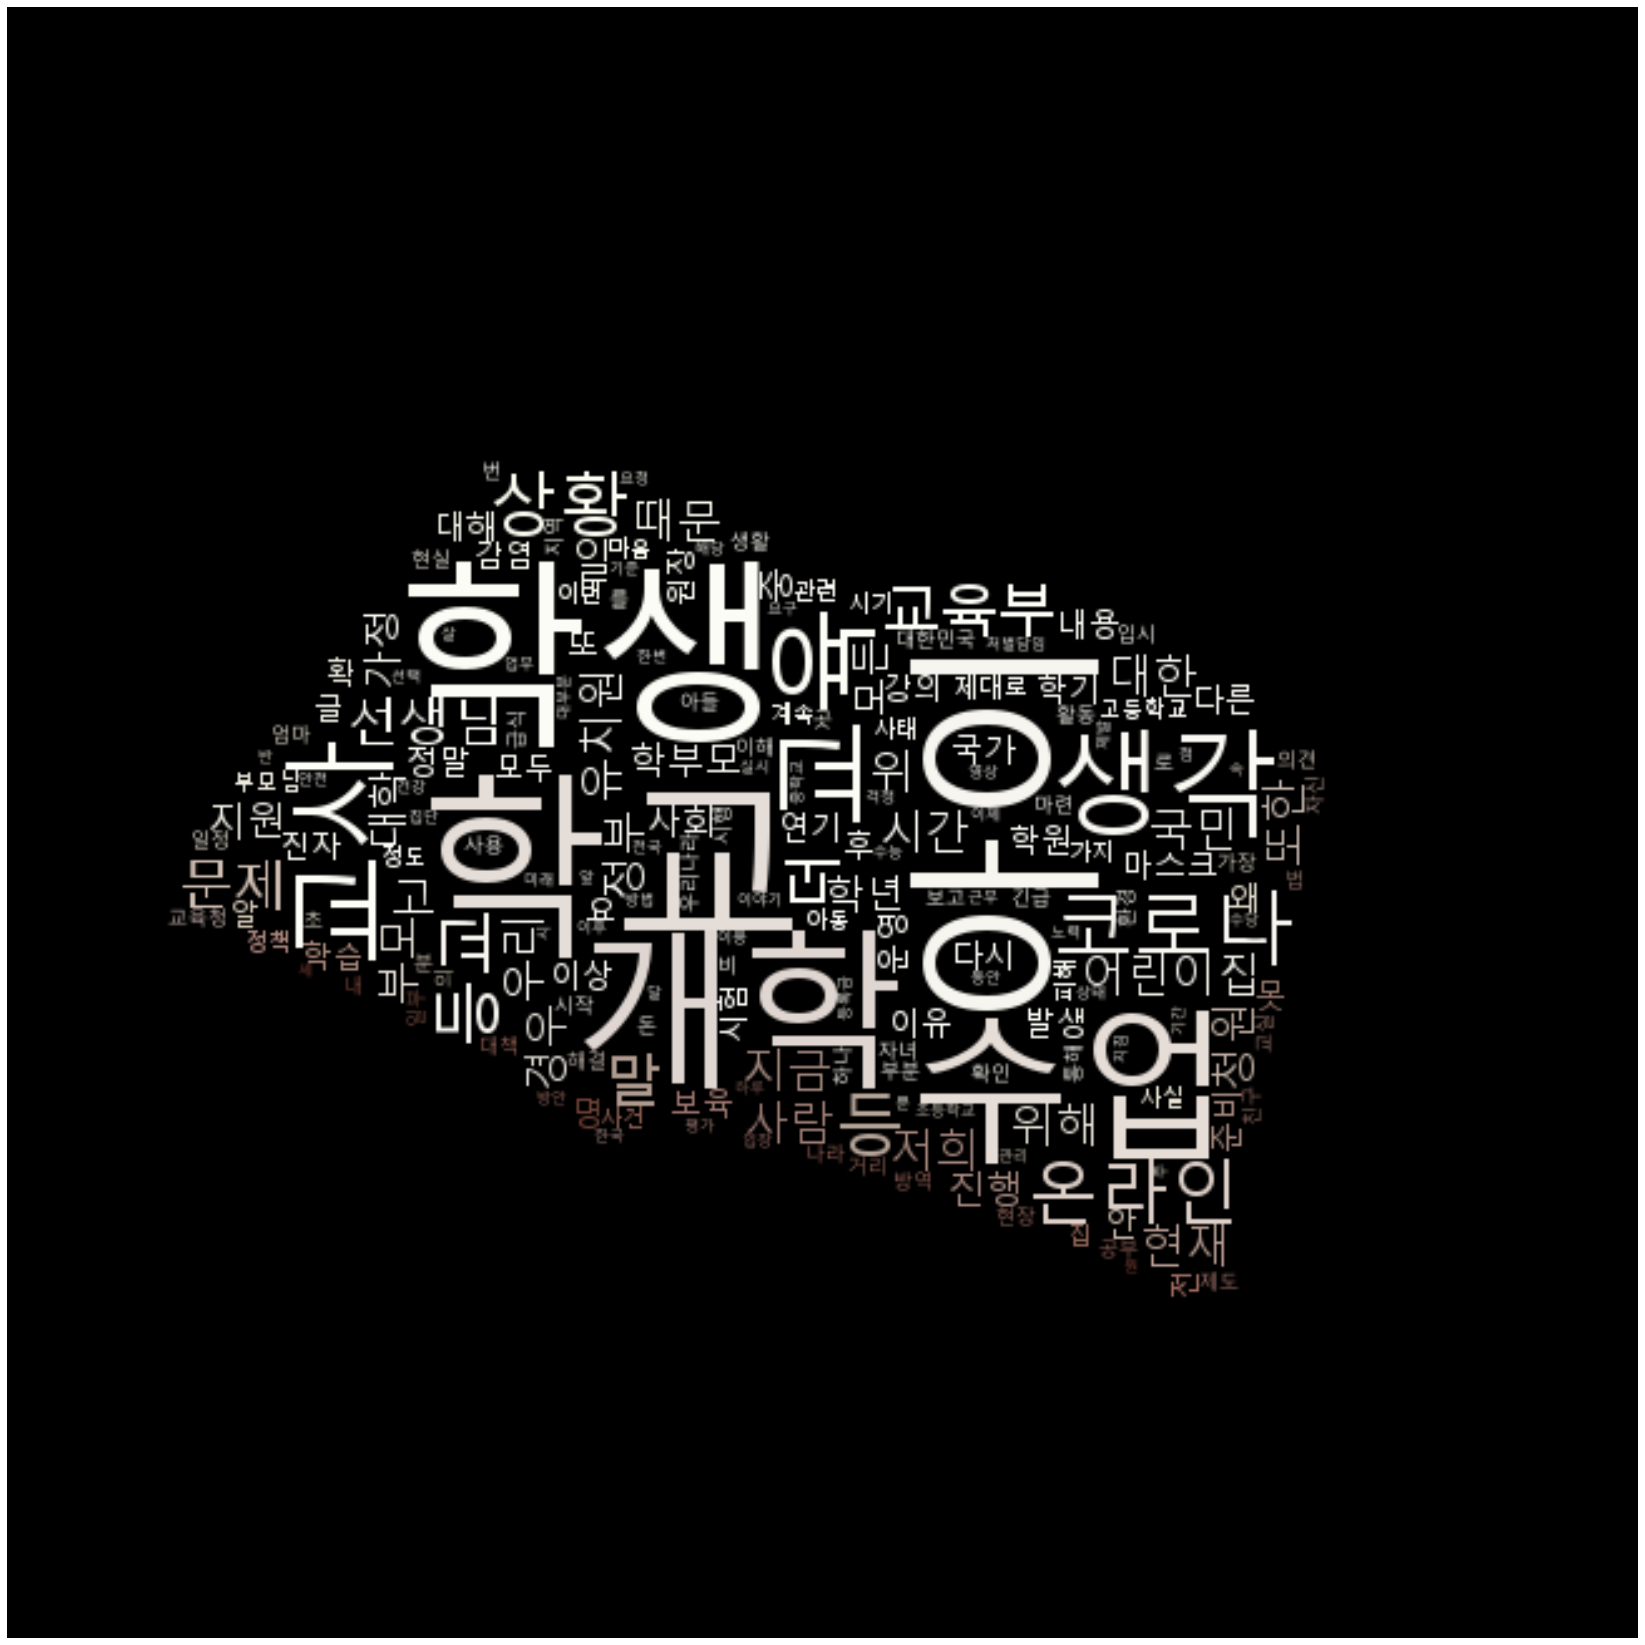

In [81]:
make_cloud("육아/교육","교육.jpg",max_font_size_n = 80,background_color_n='black',state="img")

360980
ok


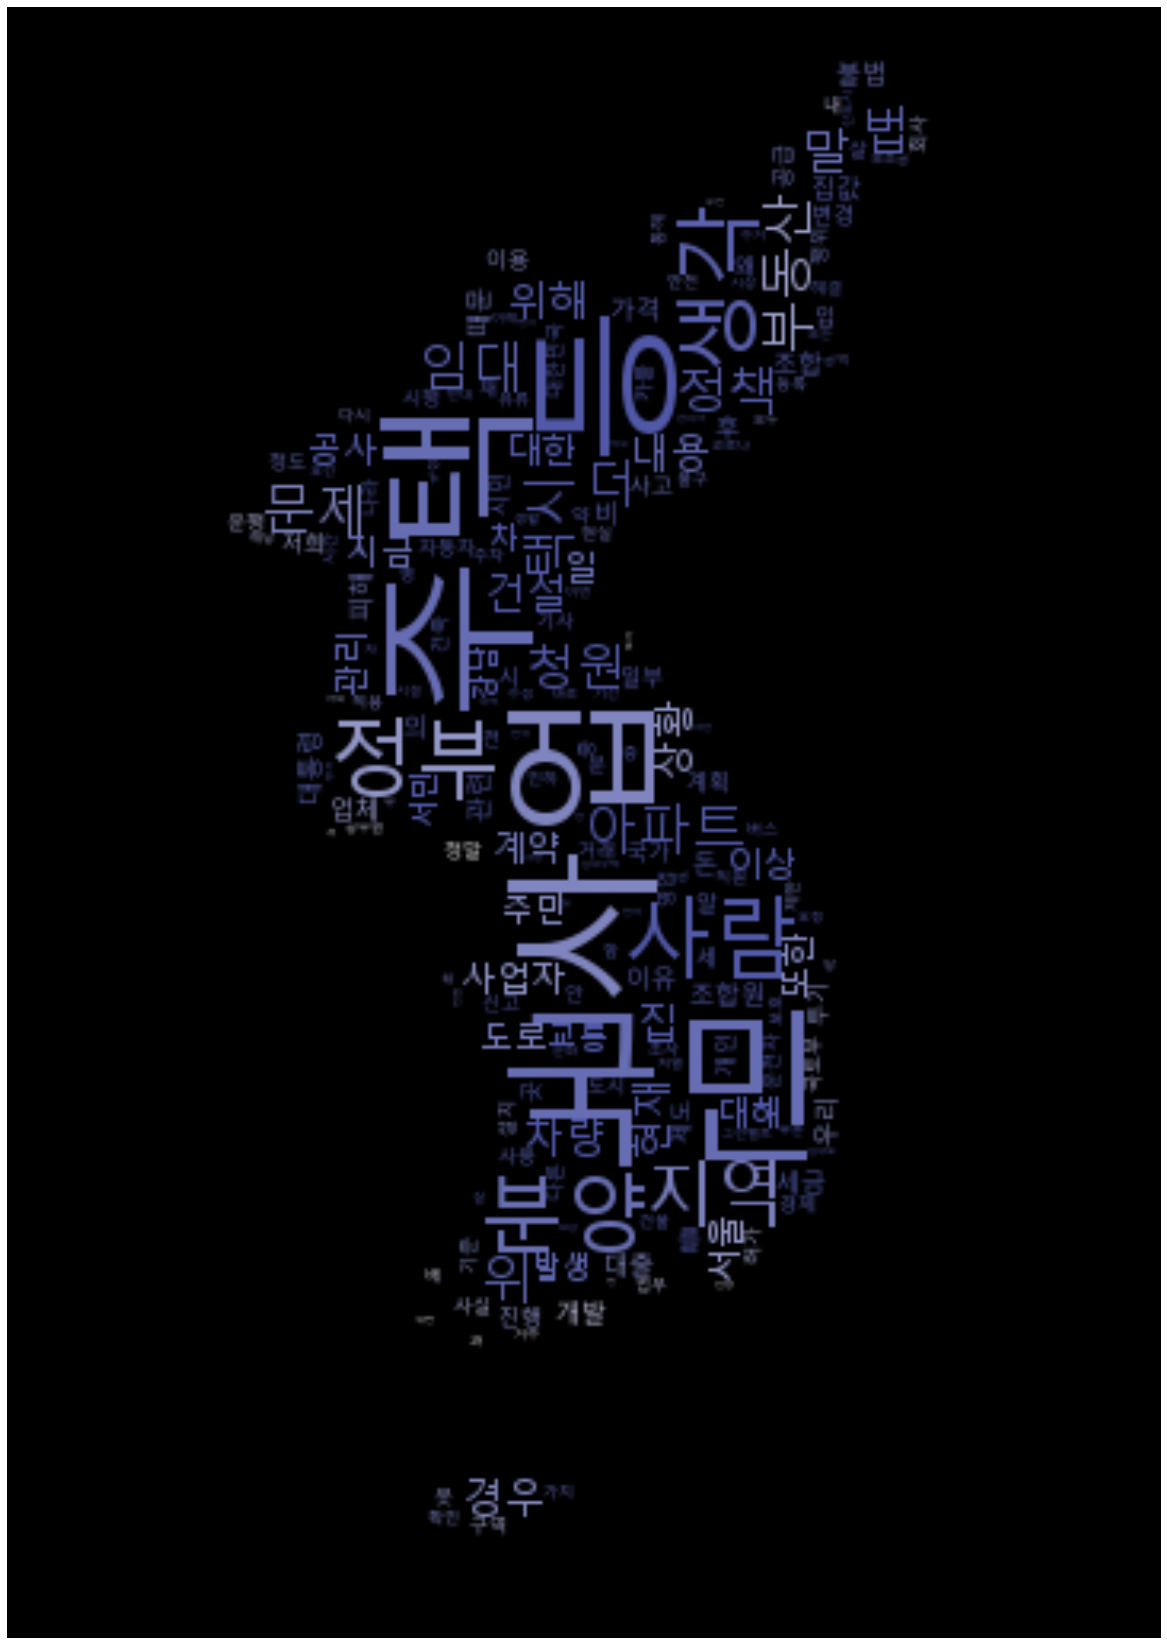

In [84]:
make_cloud("교통/건축/국토","국토.jpg",max_font_size_n = 80,background_color_n='black',state="img")

359647
ok


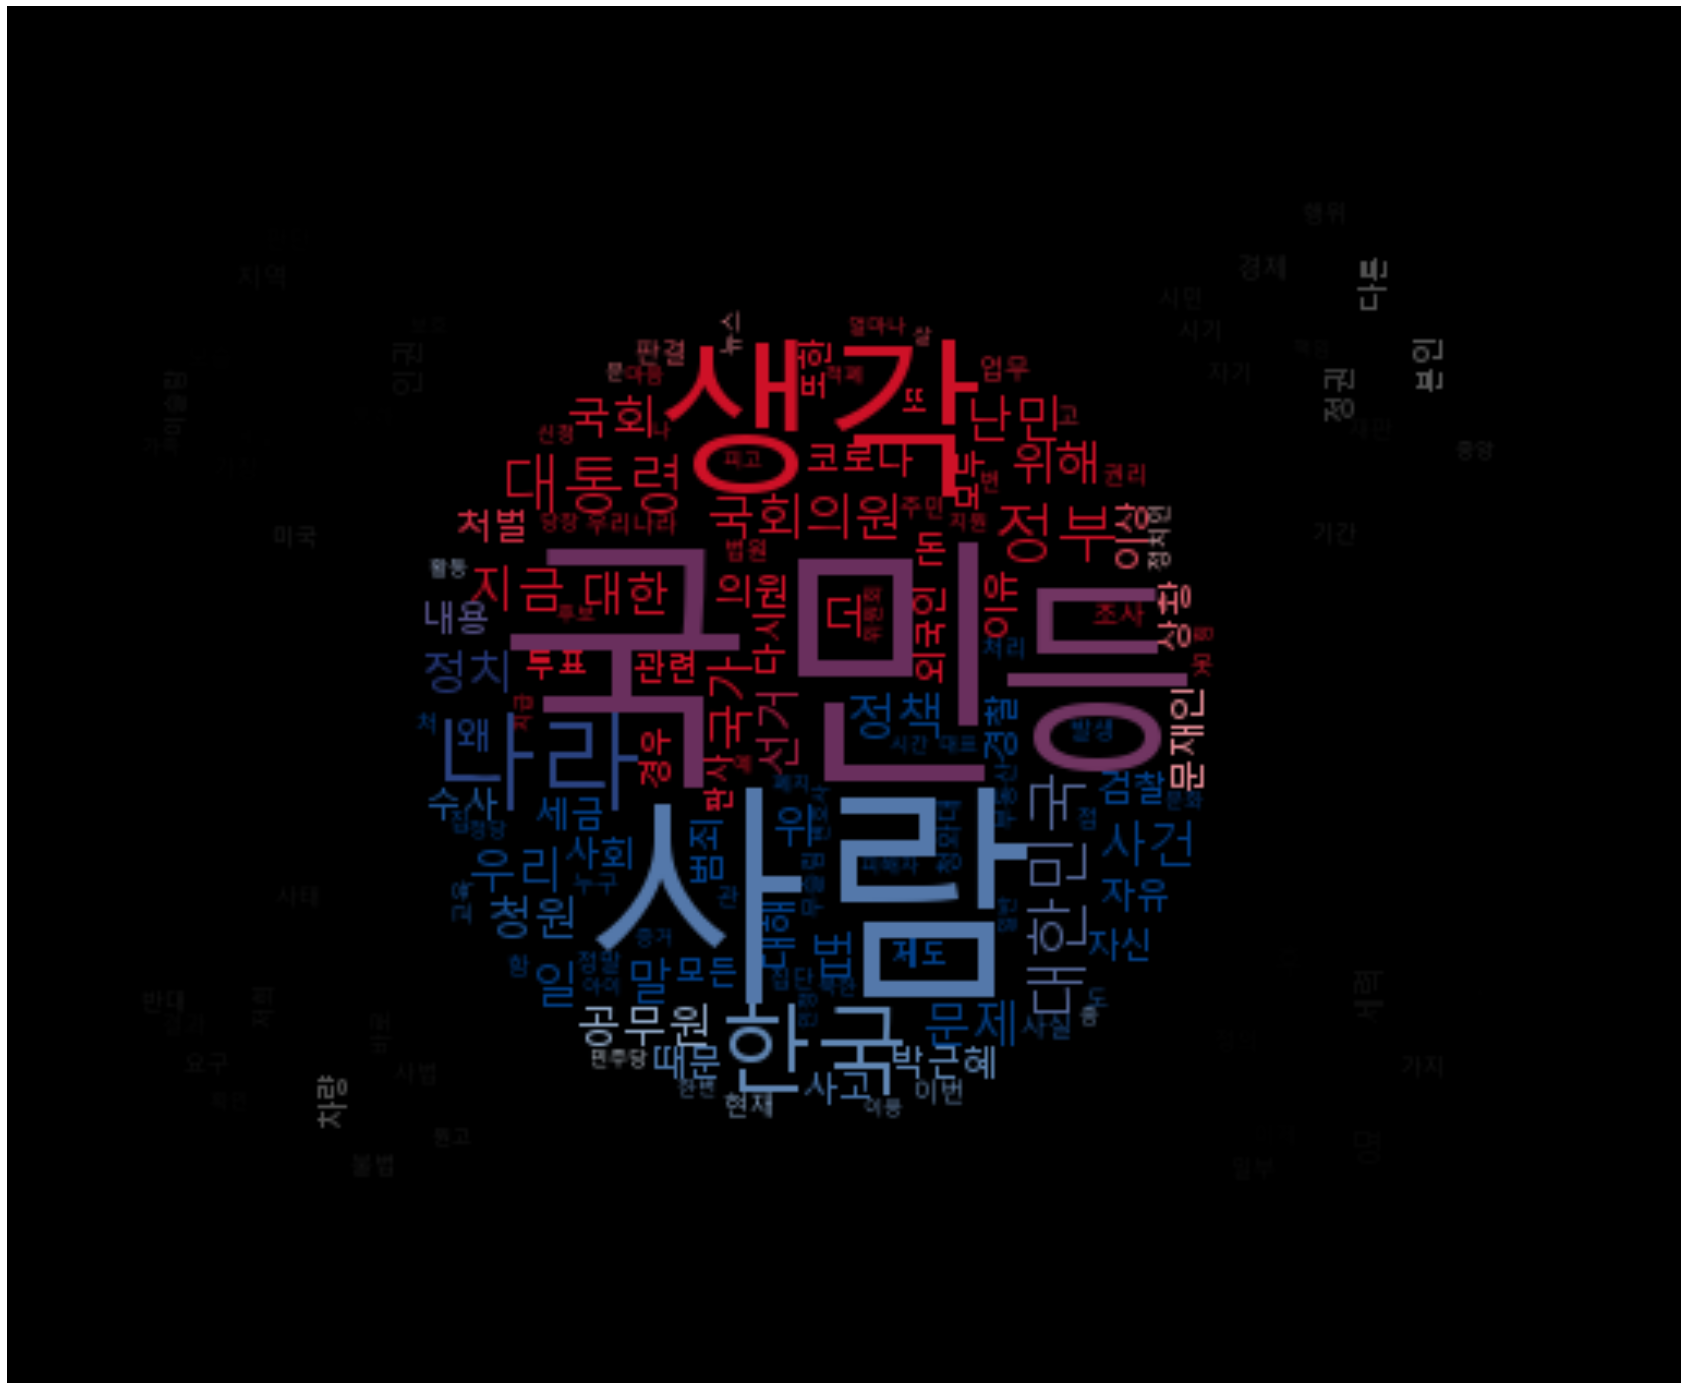

In [85]:
make_cloud("정치개혁","정치.jpg",max_font_size_n = 80,background_color_n='black',state="img")

688738
ok


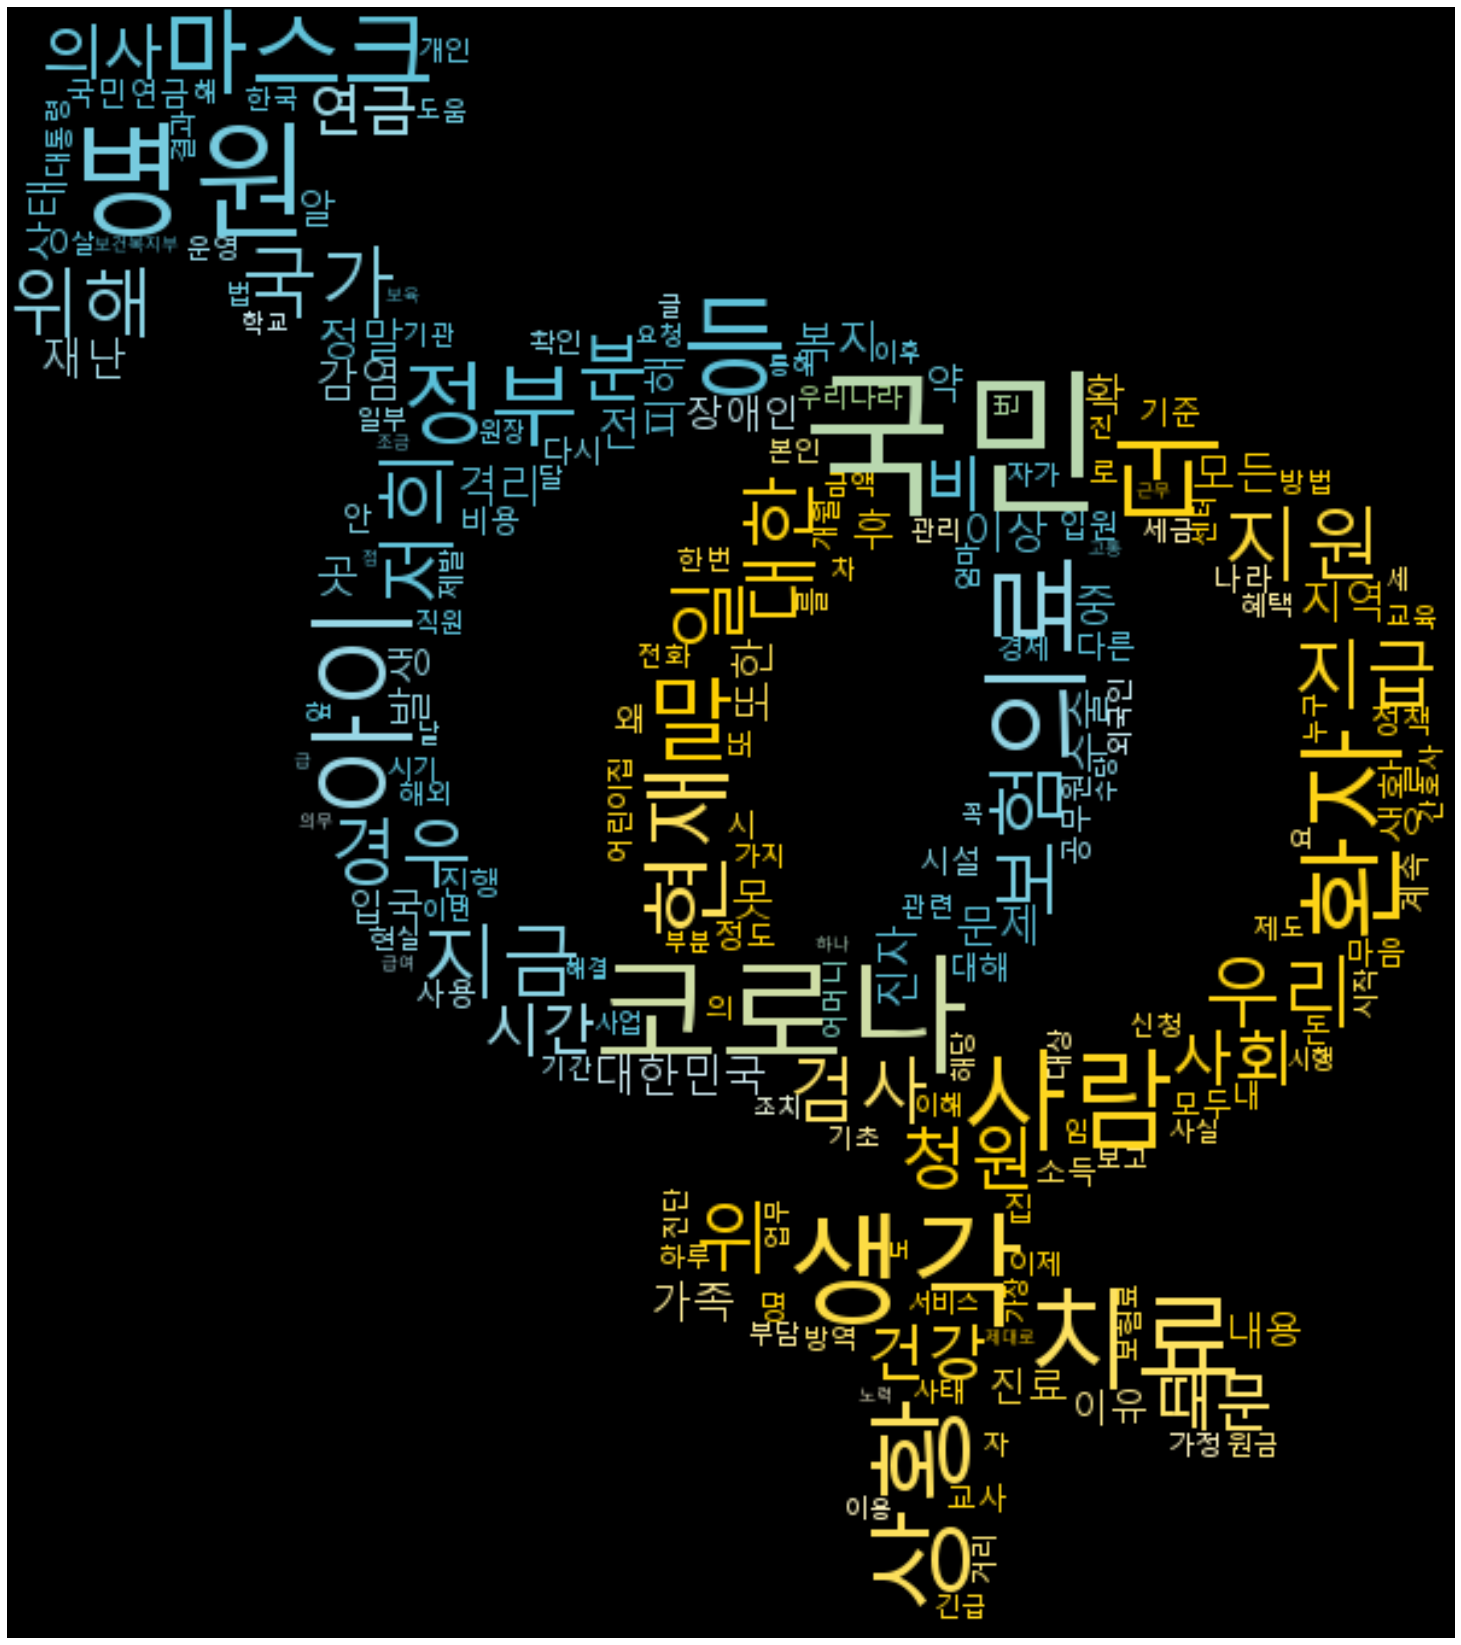

In [90]:
make_cloud("보건복지","인권.jpg",max_font_size_n = 80,background_color_n='black',state="img")